<a href="https://colab.research.google.com/github/teddierakewa/diabetes-prediction-project/blob/main/Phase_1_Data_collection_and_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the dataset
data = pd.read_csv('diabetes.csv')

# Step 3: Take a quick look
print(data.head())
print(data.info())
print(data.describe())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

In [2]:
# Check zero values in each column
zero_counts = (data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] == 0).sum()
print("Number of zeros in critical features:\n", zero_counts)


Number of zeros in critical features:
 Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


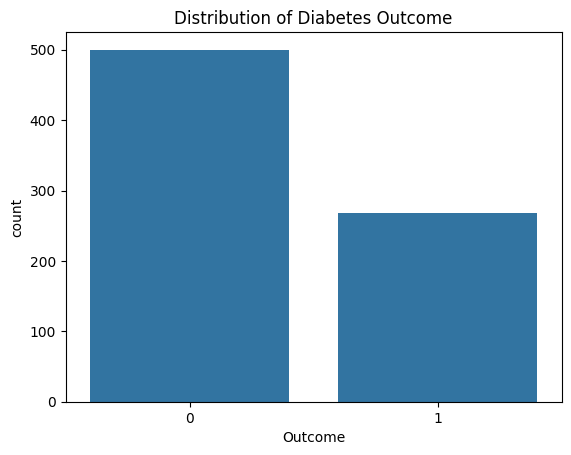

Outcome
0    500
1    268
Name: count, dtype: int64


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of diabetic vs non-diabetic patients
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Diabetes Outcome')
plt.show()

print(data['Outcome'].value_counts())


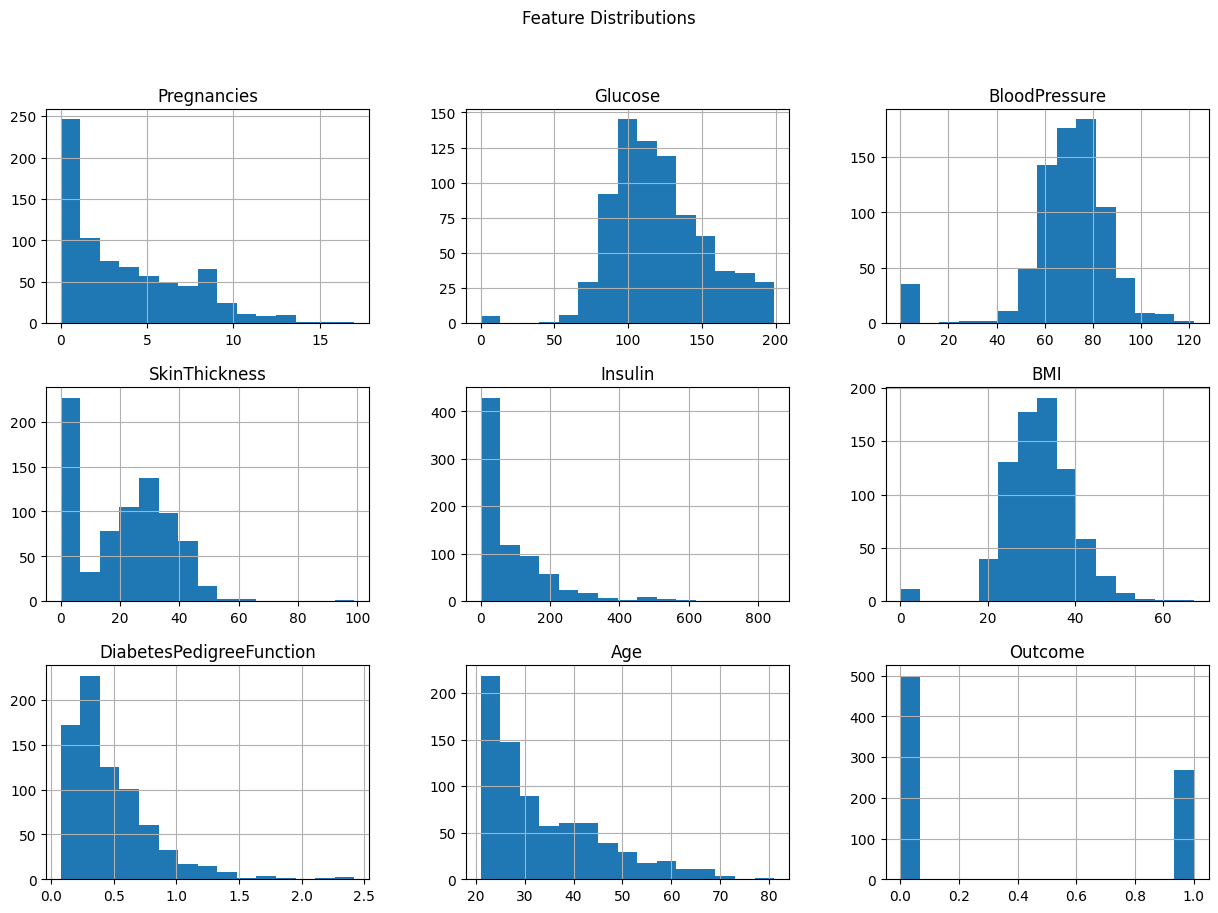

In [4]:
data.hist(bins=15, figsize=(15,10))
plt.suptitle('Feature Distributions')
plt.show()


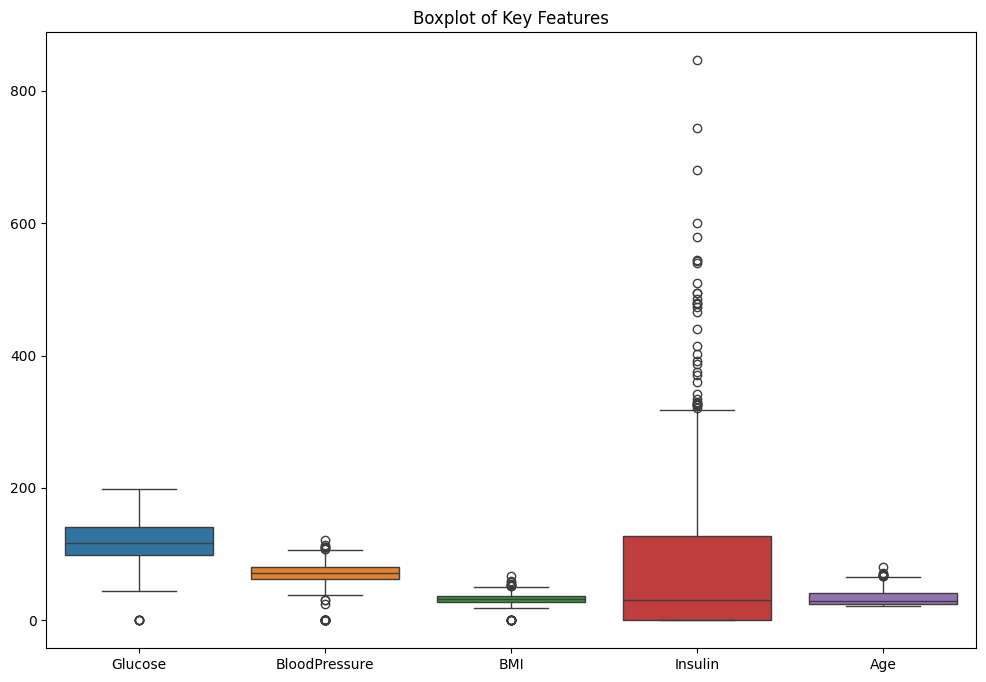

In [5]:
plt.figure(figsize=(12,8))
sns.boxplot(data=data[['Glucose','BloodPressure','BMI','Insulin','Age']])
plt.title('Boxplot of Key Features')
plt.show()


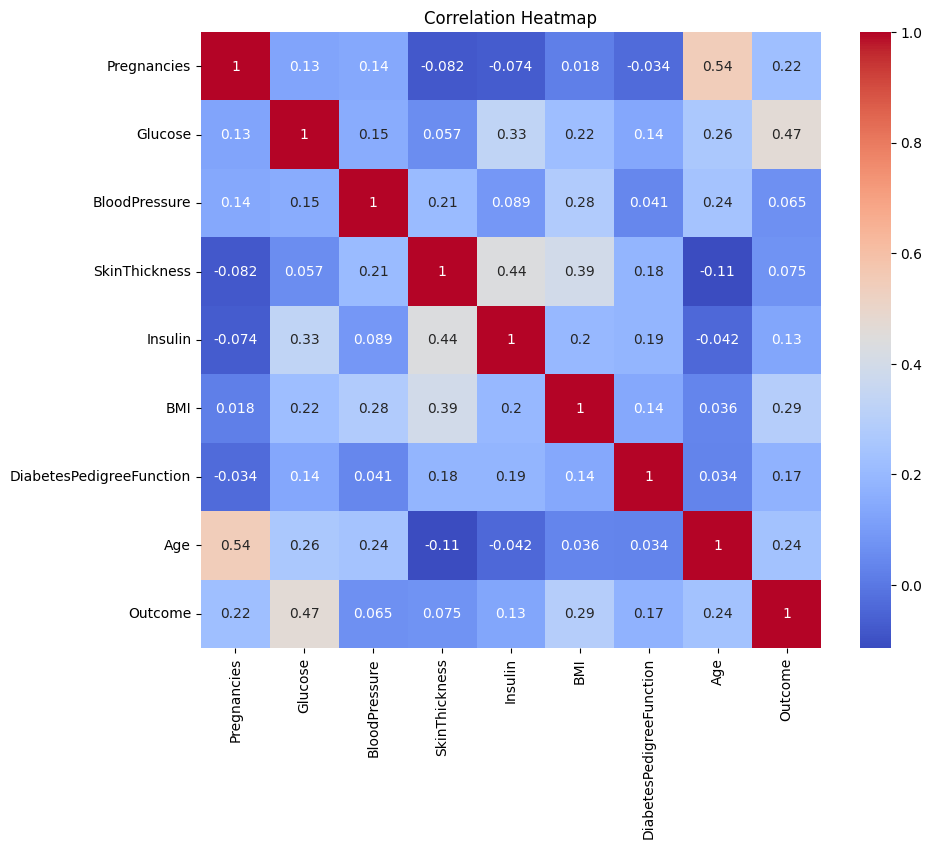

In [6]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [7]:
# Columns to fix
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_to_fix:
    median = data[col].median()
    data[col] = data[col].replace(0, median)

print("Zeros replaced with median values.")


Zeros replaced with median values.
